In [31]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.read_csv("../data/social_media_vs_productivity.csv")

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [33]:
# Summary statistics for numeric and categorical columns
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30000.0,NaN,NaN,NaN,41.486867,13.835221,18.0,30.0,41.0,53.0,65.0
gender,30000,3,Male,14452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_type,30000,6,Education,5055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_social_media_time,27235.0,NaN,NaN,NaN,3.113418,2.074813,0.0,1.639566,3.025913,4.368917,17.973256
social_platform_preference,30000,5,TikTok,6096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_notifications,30000.0,NaN,NaN,NaN,59.958767,7.723772,30.0,55.0,60.0,65.0,90.0
work_hours_per_day,30000.0,NaN,NaN,NaN,6.990792,1.997736,0.0,5.643771,6.990641,8.354725,12.0
perceived_productivity_score,28386.0,NaN,NaN,NaN,5.510488,2.02347,2.000252,3.757861,5.525005,7.265776,8.999376
actual_productivity_score,27635.0,NaN,NaN,NaN,4.951805,1.883378,0.296812,3.373284,4.951742,6.526342,9.846258
stress_level,28096.0,NaN,NaN,NaN,5.514059,2.866344,1.0,3.0,6.0,8.0,10.0


In [34]:
# Count missing values per column
missing = df.isna().sum().sort_values(ascending=False)

# Display only columns that actually have missing values
missing = missing[missing > 0]
missing

daily_social_media_time         2765
job_satisfaction_score          2730
sleep_hours                     2598
actual_productivity_score       2365
screen_time_before_sleep        2211
stress_level                    1904
perceived_productivity_score    1614
dtype: int64

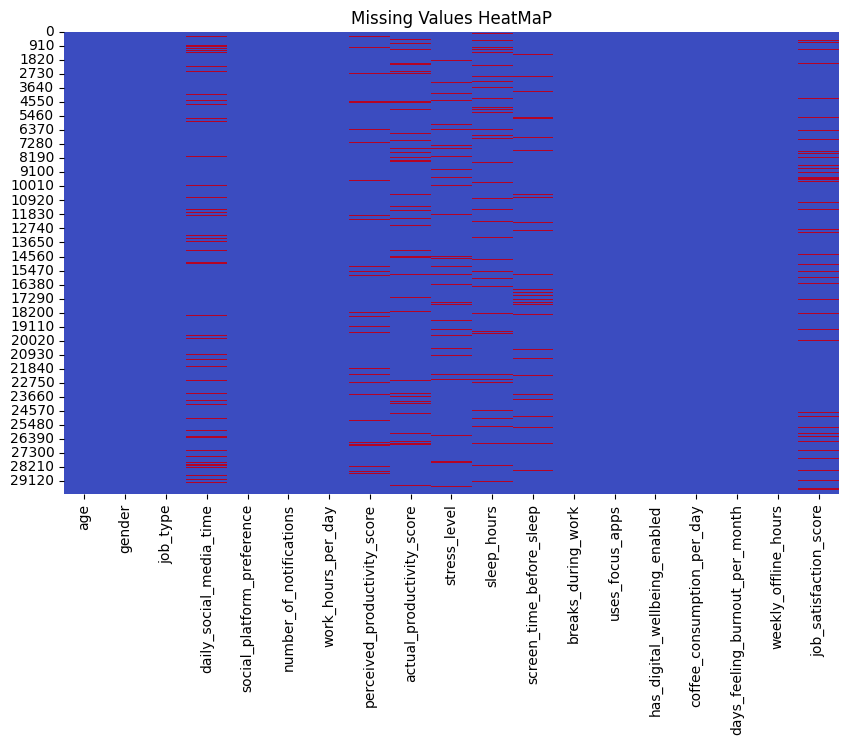

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap="coolwarm")
plt.title("Missing Values HeatMaP")
plt.show()


In [36]:
# Column groups
num_cols = [
    'age','daily_social_media_time','number_of_notifications','work_hours_per_day',
    'perceived_productivity_score','actual_productivity_score','stress_level','sleep_hours',
    'screen_time_before_sleep','breaks_during_work','coffee_consumption_per_day',
    'days_feeling_burnout_per_month','weekly_offline_hours','job_satisfaction_score'
]

cat_cols = [
    'gender','job_type','social_platform_preference','uses_focus_apps','has_digital_wellbeing_enabled'
]

In [37]:
target_col = 'actual_productivity_score'
df = df[df[target_col].notna()].copy()

In [38]:
# Imputers
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Apply
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])



In [39]:
# count remaining missing values after imputation
missing_after = df.isna().sum().sort_values(ascending=False)
missing_after[missing_after > 0]

Series([], dtype: int64)

In [40]:
col = "weekly_offline_hours"   
before = df[col].dropna().copy()

In [41]:
def cap_outliers(df, cols):
    for col in cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df[col] = np.clip(df[col], lower, upper)
    return df

outlier_cols = [
    'daily_social_media_time',
    'coffee_consumption_per_day',
    'screen_time_before_sleep',
    'days_feeling_burnout_per_month',
    'weekly_offline_hours',
    'breaks_during_work'
]

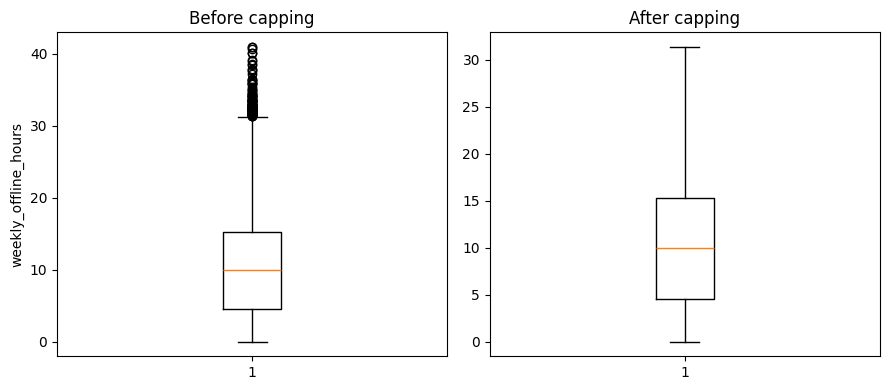

weekly_offline_hours: capped 106 values


In [42]:
# --- apply capping ---
df = cap_outliers(df, outlier_cols)

# --- AFTER capping: get updated series ---
after = df[col].dropna().copy()

# Side-by-side boxplots
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.boxplot(before, vert=True, showfliers=True)
plt.title("Before capping")
plt.ylabel(col)

plt.subplot(1,2,2)
plt.boxplot(after, vert=True, showfliers=True)
plt.title("After capping")
plt.ylabel("")

plt.tight_layout()
plt.savefig("../images/Outliers.png", dpi=300, bbox_inches="tight")
plt.show()

# Optional: count how many values were capped
q1, q3 = before.quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
n_capped = int(((before < lower) | (before > upper)).sum())
print(f"{col}: capped {n_capped} values")


In [43]:
df[outlier_cols].describe().T[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
daily_social_media_time,0.0,1.790770,3.028026,4.225514,7.87763
coffee_consumption_per_day,0.0,1.000000,2.000000,3.000000,6.00000
screen_time_before_sleep,0.0,0.568903,1.007432,1.438086,2.74186
days_feeling_burnout_per_month,0.0,8.000000,16.000000,24.000000,31.00000
weekly_offline_hours,0.0,4.547004,10.015012,15.276354,31.37038
breaks_during_work,0.0,2.000000,5.000000,8.000000,10.00000


In [44]:
cat_cols = ['gender', 'job_type', 'social_platform_preference',
            'uses_focus_apps', 'has_digital_wellbeing_enabled']

# Create encoder
encoder = OneHotEncoder(drop="first", sparse_output=False)

# Fit + transform
encoded = encoder.fit_transform(df[cat_cols])

# turn into DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))

# merge with the rest
df_encoded = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)

df_encoded.head()


,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,...,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter,uses_focus_apps_True,has_digital_wellbeing_enabled_True
0,56.0,4.180940,61.0,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46.0,3.249603,59.0,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,32.0,3.028026,57.0,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,60.0,3.028026,59.0,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,38.0,1.512568,50.0,6.429312,5.522335,4.081026,5.0,5.515251,1.518612,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27635 entries, 0 to 27634
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   27635 non-null  float64
 1   daily_social_media_time               27635 non-null  float64
 2   number_of_notifications               27635 non-null  float64
 3   work_hours_per_day                    27635 non-null  float64
 4   perceived_productivity_score          27635 non-null  float64
 5   actual_productivity_score             27635 non-null  float64
 6   stress_level                          27635 non-null  float64
 7   sleep_hours                           27635 non-null  float64
 8   screen_time_before_sleep              27635 non-null  float64
 9   breaks_during_work                    27635 non-null  float64
 10  coffee_consumption_per_day            27635 non-null  float64
 11  days_feeling_bu

In [46]:
scaler = StandardScaler()

# Identify numeric columns (everything except the target)
num_cols = df_encoded.drop(columns=['actual_productivity_score']).columns

# Fit + transform the features
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Check quick summary
df_encoded[num_cols].describe().T[['mean', 'std']].head(10)

,mean,std
age,-3.342521e-18,1.000018
daily_social_media_time,-4.576682e-17,1.000018
number_of_notifications,-1.439855e-17,1.000018
work_hours_per_day,3.725625e-16,1.000018
perceived_productivity_score,1.641692e-16,1.000018
stress_level,-5.939402e-17,1.000018
sleep_hours,5.368602e-16,1.000018
screen_time_before_sleep,-8.304878e-17,1.000018
breaks_during_work,-3.008269e-17,1.000018
coffee_consumption_per_day,4.833799e-17,1.000018


In [47]:
import os
os.makedirs("../data/processed", exist_ok=True)

# Save the model-ready table
df_encoded.to_csv("../data/processed/model_ready.csv", index=False)

# (nice to have)
target_col = "actual_productivity_score"
print("Saved:", "../data/processed/model_ready.csv", " | rows:", len(df_encoded))

Saved: ../data/processed/model_ready.csv  | rows: 27635
